# Assignment: CNN Classification on MNIST and CIFAR-10

**Name:** Amitabh Mathur

**Roll Number:** 23EJDAI003

This notebook implements CNN architectures for classification on MNIST and CIFAR-10 datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

## 1. MNIST Classification using CNN

In [2]:
# Load MNIST dataset
print('Loading MNIST Dataset...')
(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()

# Preprocess data
X_train_m = X_train_m.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_m = X_test_m.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat_m = to_categorical(y_train_m, 10)
y_test_cat_m = to_categorical(y_test_m, 10)

# Define CNN Architecture for MNIST
model_mnist = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_mnist.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print('Training MNIST CNN Model...')
history_mnist = model_mnist.fit(X_train_m, y_train_cat_m, epochs=10, validation_split=0.1, batch_size=64, verbose=1)

# Evaluate on test set
test_loss_mnist, test_acc_mnist = model_mnist.evaluate(X_test_m, y_test_cat_m, verbose=0)
print(f'MNIST Test Accuracy: {test_acc_mnist:.4f}')
print(f'MNIST Test Loss: {test_loss_mnist:.4f}')

Loading MNIST Dataset...
Training MNIST CNN Model...
Epoch 1/10


c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9255 - loss: 0.2472 - val_accuracy: 0.9858 - val_loss: 0.0486
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9743 - loss: 0.0869 - val_accuracy: 0.9880 - val_loss: 0.0401
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9887 - val_loss: 0.0372
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9892 - val_loss: 0.0340
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9871 - loss: 0.0407 - val_accuracy: 0.9920 - val_loss: 0.0279
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.9923 - val_loss: 0.0295
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9903 - loss: 0.0298 - val_accuracy: 0.9925 - val_loss: 0.0325
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9916 - loss: 0.0269 - val_accuracy: 0.9917 - val_

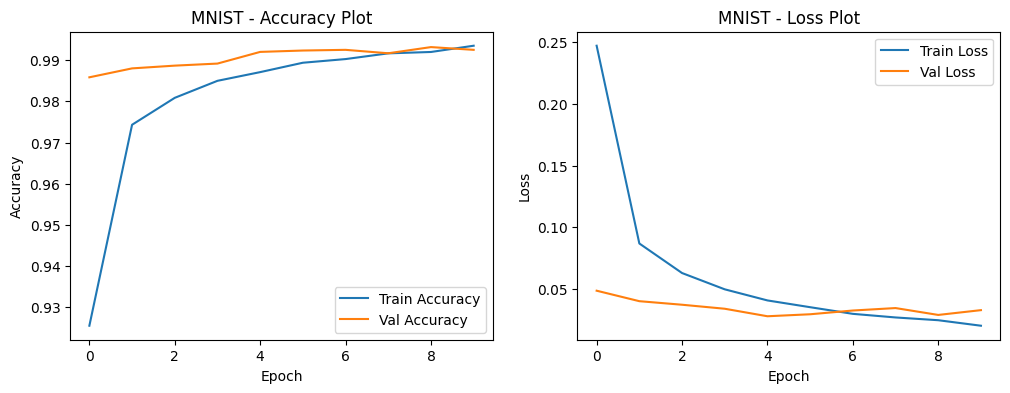

In [3]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('MNIST - Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Train Loss')
plt.plot(history_mnist.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('MNIST - Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('mnist_accuracy_loss.png')
plt.show()
plt.close()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


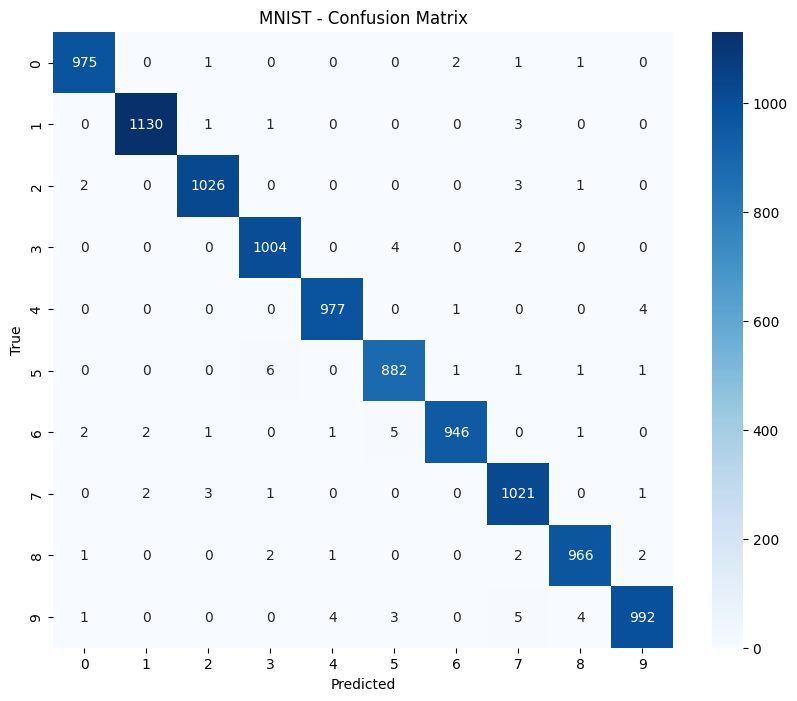

MNIST - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [4]:
# Predictions
y_pred_mnist = model_mnist.predict(X_test_m)
y_pred_classes_mnist = np.argmax(y_pred_mnist, axis=1)
y_true_mnist = y_test_m

# Confusion Matrix
cm_mnist = confusion_matrix(y_true_mnist, y_pred_classes_mnist)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues')
plt.title('MNIST - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('mnist_confusion_matrix.png')
plt.show()
plt.close()

# Classification Report
print('MNIST - Classification Report:')
print(classification_report(y_true_mnist, y_pred_classes_mnist))

## 2. CIFAR-10 Classification using CNN

In [5]:
# Load CIFAR-10 dataset
print('\nLoading CIFAR-10 Dataset...')
(X_train_c, y_train_c), (X_test_c, y_test_c) = cifar10.load_data()

# Preprocess data
X_train_c = X_train_c.astype('float32') / 255.0
X_test_c = X_test_c.astype('float32') / 255.0

y_train_cat_c = to_categorical(y_train_c, 10)
y_test_cat_c = to_categorical(y_test_c, 10)

# Define CNN Architecture for CIFAR-10
model_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cifar.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print('Training CIFAR-10 CNN Model...')
history_cifar = model_cifar.fit(X_train_c, y_train_cat_c, epochs=15, validation_split=0.1, batch_size=64, verbose=1)

# Evaluate on test set
test_loss_cifar, test_acc_cifar = model_cifar.evaluate(X_test_c, y_test_cat_c, verbose=0)
print(f'CIFAR-10 Test Accuracy: {test_acc_cifar:.4f}')
print(f'CIFAR-10 Test Loss: {test_loss_cifar:.4f}')


Loading CIFAR-10 Dataset...
Training CIFAR-10 CNN Model...
Epoch 1/15


c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3887 - loss: 1.6524 - val_accuracy: 0.5096 - val_loss: 1.3434
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 147s 209ms/step - accuracy: 0.5363 - loss: 1.2937 - val_accuracy: 0.5860 - val_loss: 1.1467
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5983 - loss: 1.1346 - val_accuracy: 0.6390 - val_loss: 1.0213
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6451 - loss: 1.0204 - val_accuracy: 0.6726 - val_loss: 0.9412
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6710 - loss: 0.9404 - val_accuracy: 0.6872 - val_loss: 0.9097
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6993 - loss: 0.8605 - val_accuracy: 0.7066 - val_loss: 0.8513
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7199 - loss: 0.8094 - val_accuracy: 0.7064 - val_loss: 0.8577
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7370 - loss: 0.7561 - val_accuracy: 0.7102 -

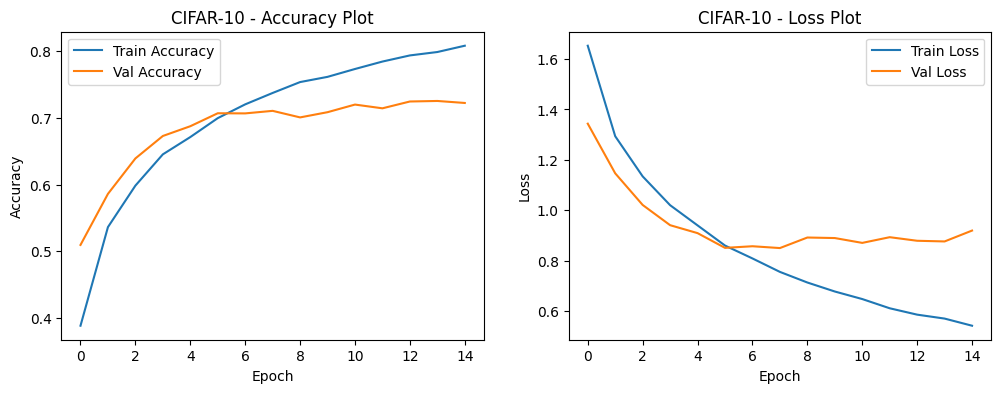

In [6]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('CIFAR-10 - Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Train Loss')
plt.plot(history_cifar.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('CIFAR-10 - Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('cifar10_accuracy_loss.png')
plt.show()
plt.close()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


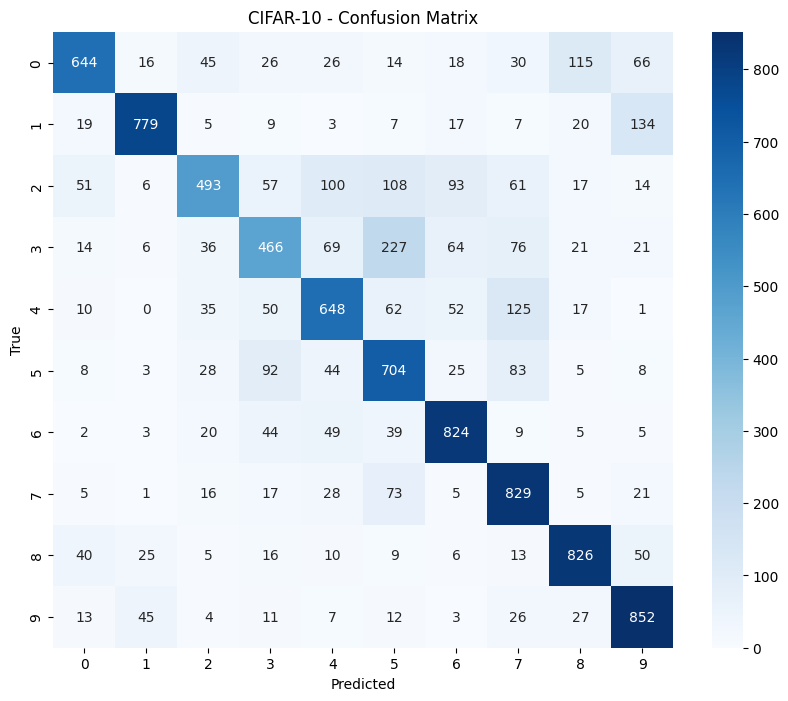

CIFAR-10 - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1000
           1       0.88      0.78      0.83      1000
           2       0.72      0.49      0.58      1000
           3       0.59      0.47      0.52      1000
           4       0.66      0.65      0.65      1000
           5       0.56      0.70      0.62      1000
           6       0.74      0.82      0.78      1000
           7       0.66      0.83      0.73      1000
           8       0.78      0.83      0.80      1000
           9       0.73      0.85      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [7]:
# Predictions
y_pred_cifar = model_cifar.predict(X_test_c)
y_pred_classes_cifar = np.argmax(y_pred_cifar, axis=1)
y_true_cifar = y_test_c.flatten()

# Confusion Matrix
cm_cifar = confusion_matrix(y_true_cifar, y_pred_classes_cifar)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cifar, annot=True, fmt='d', cmap='Blues')
plt.title('CIFAR-10 - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('cifar10_confusion_matrix.png')
plt.show()
plt.close()

# Classification Report
print('CIFAR-10 - Classification Report:')
print(classification_report(y_true_cifar, y_pred_classes_cifar))

git hub : https://github.com/raosabh007